In [1]:
from ete3 import Tree
import os
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

from physhapes.simulate import simulate_shapes
from physhapes.helper_functions import get_flat_values_sim


In [2]:
# load phylogeny 
tree = Tree('../data/chazot_subtree_rounded.nw')
print(tree)
# load root shape for simulation 
root = np.genfromtxt('../data/hercules_forewing_n=20.csv', delimiter=',')


      /-niepelti
   /-|
  |   \-theseus
--|
  |   /-hercules
   \-|
     |   /-amphitryon
      \-|
         \-telemachus


In [3]:
leafidx = []
inneridx = []
species = []
i = 0
for node in tree.traverse('levelorder'):
    if node.is_leaf():
        print(node.name)
        leafidx.append(i)
        species.append(node.name)
    else:
        inneridx.append(i)
    i+=1
print(leafidx)
print(inneridx)
print(species)

niepelti
theseus
hercules
amphitryon
telemachus
[3, 4, 5, 7, 8]
[0, 1, 2, 6]
['niepelti', 'theseus', 'hercules', 'amphitryon', 'telemachus']


In [4]:
ds = np.random.randint(0, 2**32)
sigma = 0.7
alpha = 0.1
dt = 0.05
outputpath = f'exp_2_sigma={sigma}_alpha={alpha}_dt={dt}/seed={ds}'
os.makedirs(outputpath, exist_ok=True)
simtree = simulate_shapes(ds=ds, dt=dt, sigma=sigma, alpha=alpha, root=root, tree=tree, rb=0)
flat_true_tree = np.array(get_flat_values_sim(simtree)) 
flat_true_tree.shape
#

(9, 40)

In [5]:
np.savetxt(f'{outputpath}/flat_true_tree.csv', flat_true_tree, delimiter=",")

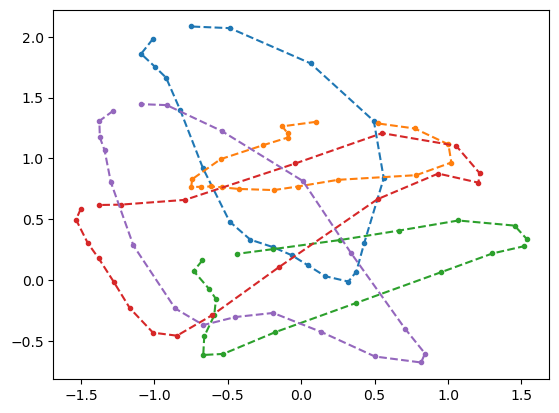

In [6]:
# show leaves 
[plt.plot(flat_true_tree[idx][0::2], flat_true_tree[idx][1::2], '--o', markersize=3, label='Simulated data') for idx in leafidx]
plt.savefig(f'{outputpath}/simulated_leaves.pdf', bbox_inches='tight')

In [8]:
leaves = pd.DataFrame(flat_true_tree[leafidx, :], index=species)
#leaves.columns = [['X'+str(i), 'Y'+str(i)] for i in range(leaves.shape[1] // 2)]
leaves.columns = [f'X{i}' if j % 2 == 0 else f'Y{i}' 
                  for i in range(leaves.shape[1] // 2) for j in range(2)]
print(leaves)
#path = f'comparison/seed={ds}_sigma={sigma}_alpha={alpha}_dt={dt}'
#os.makedirs(path, exist_ok=True)
leaves.to_csv(f'{outputpath}/leaves.csv', index=False, header=False)
flat_true_tree_df = pd.DataFrame(flat_true_tree)
flat_true_tree_df.to_csv(f'{outputpath}/flat_true_tree.csv', index=False, header=False)

                  X0        Y0        X1        Y1        X2        Y2  \
niepelti   -1.009000  1.984011 -1.090230  1.860428 -0.997749  1.756002   
theseus     0.103546  1.301154 -0.128926  1.263735 -0.092093  1.206513   
hercules   -0.672771  0.160290 -0.732615  0.073606 -0.627888 -0.073148   
amphitryon -1.500625  0.586119 -1.533462  0.496085 -1.453122  0.302557   
telemachus -1.278487  1.393127 -1.374498  1.307917 -1.371319  1.173086   

                  X3        Y3        X4        Y4  ...       X15       Y15  \
niepelti   -0.920128  1.664366 -0.823371  1.396516  ...  0.562291  0.836929   
theseus    -0.092089  1.171095 -0.262227  1.107529  ...  0.784295  0.862144   
hercules   -0.580215 -0.156611 -0.592384 -0.292335  ...  1.070010  0.489030   
amphitryon -1.378971  0.177486 -1.278014 -0.012986  ...  0.551636  1.207878   
telemachus -1.339044  1.067640 -1.296314  0.804594  ...  0.336994  0.225424   

                 X16       Y16       X17       Y17       X18       Y18  \
niepel